In [1]:
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mongo = MongoClient(port=27017)

In [3]:
print(mongo.list_database_names())

['admin', 'config', 'my_database']


In [4]:
db = mongo['my_database']

In [5]:
print(db.list_collection_names())

['nps_data']


In [6]:
nps_data = db['nps_data']

In [7]:
nps_data.count_documents({})

470

In [8]:
pprint(db.nps_data.find_one())

{'_id': ObjectId('64bda0d2117a192e0d47b9aa'),
 'activities': [{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238',
                 'name': 'Astronomy'},
                {'id': 'D37A0003-8317-4F04-8FB0-4CF0A272E195',
                 'name': 'Stargazing'},
                {'id': '1DFACD97-1B9C-4F5A-80F2-05593604799E', 'name': 'Food'},
                {'id': 'C6D3230A-2CEA-4AFE-BFF3-DC1E2C2C4BB4',
                 'name': 'Picnicking'},
                {'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3',
                 'name': 'Guided Tours'},
                {'id': 'A0631906-9672-4583-91DE-113B93DB6B6E',
                 'name': 'Self-Guided Tours - Walking'},
                {'id': '42FD78B9-2B90-4AA9-BC43-F10E9FEA8B5A',
                 'name': 'Hands-On'},
                {'id': 'DF4A35E0-7983-4A3E-BC47-F37B872B0F25',
                 'name': 'Junior Ranger Program'},
                {'id': '0B685688-3405-4E2A-ABBA-E3069492EC50',
                 'name': 'Wildlife Watching'},
                

In [9]:
unique_designations = db.nps_data.distinct('designation')

# Print the number of unique documents
print("Number of unique designations:", len(unique_designations))
print("Unique designations:", unique_designations)

Number of unique designations: 47
Unique designations: ['', 'Affiliated Area', 'Ecological & Historic Preserve', 'International Historic Site', 'International Park', 'Memorial', 'Memorial Parkway', 'National Battlefield', 'National Battlefield Park', 'National Battlefield Site', 'National Geologic Trail', 'National Historic Area', 'National Historic Site', 'National Historic Trail', 'National Historical Park', 'National Historical Park and Ecological Preserve', 'National Historical Park and Preserve', 'National Historical Reserve', 'National Lakeshore', 'National Memorial', 'National Military Park', 'National Monument', 'National Monument & Preserve', 'National Monument and Historic Shrine', 'National Park', 'National Park & Preserve', 'National Parks', 'National Preserve', 'National Recreation Area', 'National Recreational River', 'National Reserve', 'National River', 'National River & Recreation Area', 'National Scenic River', 'National Scenic Riverway', 'National Scenic Riverways', 

In [10]:
results = db.nps_data.aggregate([
    {"$group": {"_id": "$designation", "count": {"$sum": 1}}}
])

# Print the results
#for result in results:
    #print(f"Designation: {result['_id']}, Count: {result['count']}")
    

In [11]:
designation_df = pd.DataFrame(results)

In [12]:
designation_df = designation_df.rename(columns={"count": "Count",
                                              "_id": "Designations"})
designation_df

,Designations,Count
0,National Park & Preserve,8
1,National Battlefield Park,4
2,International Park,1
3,National Military Park,9
4,National Scenic Riverway,1
5,National Memorial,17
6,National Scenic Riverways,1
7,National Historical Park and Ecological Preserve,1
8,Ecological & Historic Preserve,1
9,Scenic & Recreational River,1


In [13]:
row = 5
designation_df.drop(designation_df.index[row], inplace=True)
designation_df

,Designations,Count
0,National Park & Preserve,8
1,National Battlefield Park,4
2,International Park,1
3,National Military Park,9
4,National Scenic Riverway,1
6,National Scenic Riverways,1
7,National Historical Park and Ecological Preserve,1
8,Ecological & Historic Preserve,1
9,Scenic & Recreational River,1
10,Memorial Parkway,1


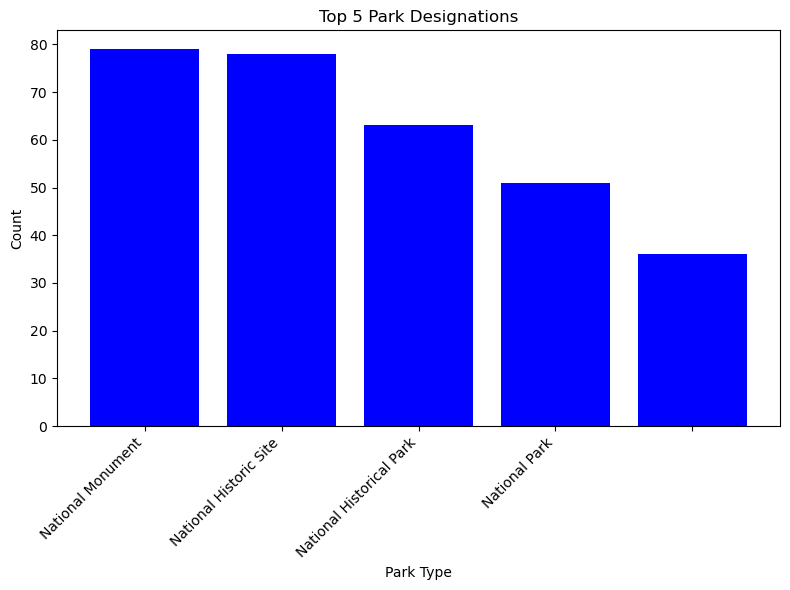

In [14]:

designation_df.sort_values(by="Count", ascending=False, inplace=True)

# Select top 5 designations
top_5_designations = designation_df.head(5)

# Create the bar chart for the top 5 designations
plt.figure(figsize=(8, 6))
plt.bar(top_5_designations["Designations"], top_5_designations["Count"], color="blue")

# Set axis labels and title
plt.xlabel("Park Type")
plt.ylabel("Count")
plt.title("Top 5 Park Designations")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Save the chart as an image
plt.tight_layout()
plt.savefig("Top5ParkDesignationsChart.png")

# Show the plot
plt.show()



In [15]:
pipeline = [
    {
        "$unwind": "$activities"
    },
    {
            "$group": {
            "_id": "$designation",
            "ActivityName": {"$push": "$activities.name"},
            "Count": {"$sum": 1}
        
        }
    }

]

results2 = db.nps_data.aggregate(pipeline)

In [16]:
designation_df2 = pd.DataFrame(results2)

print("Rows in DataFrame: ", len(designation_df2))
designation_df2

Rows in DataFrame:  47


,_id,ActivityName,Count
0,International Historic Site,"[Paddling, Junior Ranger Program, Wildlife Wat...",3
1,National Park,"[Arts and Culture, Cultural Demonstrations, As...",1518
2,National Historical Reserve,"[Astronomy, Stargazing, Biking, Mountain Bikin...",33
3,National Memorial,"[Arts and Culture, Cultural Demonstrations, Bo...",156
4,National Battlefield Site,"[Guided Tours, Self-Guided Tours - Walking, Se...",3
5,National Military Park,"[Auto and ATV, Scenic Driving, Biking, Road Bi...",174
6,National Scenic River,"[Biking, Mountain Biking, Boating, Fishing, Fr...",36
7,National Historic Trail,"[Arts and Culture, Cultural Demonstrations, Au...",207
8,Part of Statue of Liberty National Monument,"[Food, Dining, Picnicking, Guided Tours, Self-...",11
9,National and State Parks,"[Arts and Culture, Cultural Demonstrations, Au...",24


In [17]:
# Create "first"name" and "last_name" column with the first and last names from the "name" column. 
#designation_df2[['Activity 1', 'Activity 2', ]] = designation_df2['ActivityName'].str.split(",", expand=True)

# Drop the contact_name column
#designation_df2 = designation_df2.drop(('name'), axis=1)

#display df
#designation_df2.head()

In [26]:
unwind_query = {"$unwind": "$entranceFees"}

match_query = {'$match': {'entranceFees.title': {'$regex': "Entrance - Private Vehicle"}}}

group_query = {
    '$group': {
        '_id': "$parkCode", 
        'entranceFeesCost': {'$push': '$entranceFees.cost'}
    }
}

pipeline = [unwind_query, match_query, group_query]
results = list(nps_data.aggregate(pipeline))


In [27]:
fees_df = pd.DataFrame(results)
fees_df.rename(columns={'_id': 'parkCode'}, inplace=True)
fees_df

,parkCode,entranceFeesCost
0,arch,[30.00]
1,choh,[20.00]
2,indu,[25.00]
3,libi,[25.00]
4,acad,[35.00]
...,...,...
66,hale,[30.00]
67,band,[25.00]
68,orpi,[25.00]
69,gosp,[20.00]
